<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

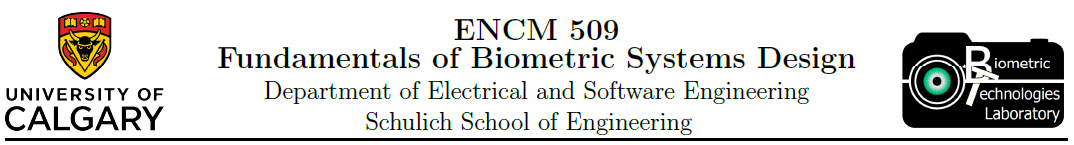

# ENCM 509 - Lab 3 Report

**Student Names**


**Mushtaba Al Yasseen (30094000)**
\
**Usman Khan (30092202)**

Importing all necessary libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

# **Introduction:**

## **Exercise 1:**

Loading genuine and imposter signature data:

In [14]:
base_dir = './Data/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'Usman-Labs/'
dir_impostor = base_dir + 'Mushtaba-Labs/'

# amount of signatures to be loaded
total_signatures = 30
numForgedSigs = 30

# lists to store the loaded signatures
auth_lst = []
imp_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_imp = pd.read_csv(dir_impostor + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values)
    imp_lst.append(csv_imp.values)

print('Size of the "auth_lst" vector: %d' % (len(auth_lst)))
print('Size of the "imp_lst" vector: %d' % (len(imp_lst)))

Size of the "auth_lst" vector: 30
Size of the "imp_lst" vector: 30


Creating and training the GMM model in order to plot normalized Probability Density Functions. The method below takes in 2 parameters, the number of signatures that will be used to train the GMM model, and the number of Gaussian mixture components. Later, we will plot 4 different sets of distributions for 4 different sets of parameters and compare their differences. In addition, we will find the mean $(\mu)$ and standard deviation $(\sigma)$ for both the genuine and imposter scores.

In [15]:
def GMM_distribution(auth_lst, imp_lst, num_of_signatures, num_of_gmm_components):

    # number of signature samples to use for training the models
    NUMTRAININGPATTERNS = num_of_signatures
    # number of Gaussian mixture components in the GMM
    NUMGCOMPONENTS = num_of_gmm_components

    # first, we will select the subset of signatures to train
    # usually we don't know the final size of train_set because
    # each signature has different number of points. 
    # to later on use 'concatenate', is necessary to take the first sample outside the loop
    train_set = np.reshape(auth_lst[0], (-1,4))

    # this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
    # this matrix, stored in the varaible "train_set" will be used for the training
    for i in range(1,NUMTRAININGPATTERNS):
        # taking from authentic/genuine
        sample = np.reshape(auth_lst[i], (-1,4))
        train_set = np.concatenate((train_set, sample), axis=0)

    # Training the GaussianMixture model from Scikit-Learn library
    # the .fit(...) will perform the training step using the "train_set" 
    gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

    # using remaining genuine samples to calculate the log-likelihood score
    aScores = []

    # going through the remaining signatures after removing the first 20 for training
    for i in range(NUMTRAININGPATTERNS, total_signatures):
        # taking from authentic/genuine
        sample =  np.reshape(auth_lst[i], (-1,4))
        # compute the per-sample average log-likelihood of the given data.
        score = gmm.score(sample)
        # print('%d: %.4f' % (i, score))
        # add the score calculated to the list aScores
        aScores.append(score)

    # calculating the log-likelihood score score of the imposter samples to check how the GMM model
    # distinguishes the classes of genuine and imposter signatures
    fScores = []
    for i in range(numForgedSigs):
        # taking from the impostor
        sample =  np.reshape(imp_lst[i], (-1,4))
        score = gmm.score(sample)
        # print('%d: %.4f' % (i, score))
        fScores.append(score)

    # calculating the mean and standard deviation of the scores

    # genuine set
    aMu = np.mean(aScores)
    aStd = np.std(aScores)

    # impostor set
    fMu = np.mean(fScores)
    fStd = np.std(fScores)

    print('Mean of genuine scores: %.4f' % (aMu))
    print('Standard deviation of genuine scores: %.4f' % (aStd))
    print('Mean of imposter scores: %.4f' % (fMu))
    print('Standard deviation of imposter scores: %.4f' % (fStd))

    # change this range for your set
    x = np.arange(min(fScores) - 10, max(aScores) + 20, 0.01)

    aProb = norm.pdf(x, loc=aMu, scale=aStd)
    fProb = norm.pdf(x, loc=fMu, scale=fStd)
    plt.plot(x, aProb, 'g')
    plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
    plt.plot(x, fProb, 'r')
    plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
    plt.legend();
    plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

    plt.figure(figsize=(10,4))

    # Authentic set
    x = np.arange(min(aScores) - 10, max(aScores) + 20, 0.01)
    aProb = norm.pdf(x, loc=aMu, scale=aStd)

    plt.subplot(1,2,1)
    plt.plot(x, aProb, 'g')
    plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
    plt.legend();
    plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


    # Forged (impostor) set
    x = np.arange(min(fScores) - 10, max(fScores) + 20, 0.01)
    fProb = norm.pdf(x, loc=fMu, scale=fStd)

    plt.subplot(1,2,2)
    plt.plot(x, fProb, 'r')
    plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
    plt.legend();
    plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

#### Set # 1 - 20 Training Signatures, 20 Gaussian Components

Mean of genuine scores: -19.4194
Standard deviation of genuine scores: 3.5903
Mean of imposter scores: -25.0688
Standard deviation of imposter scores: 2.3752


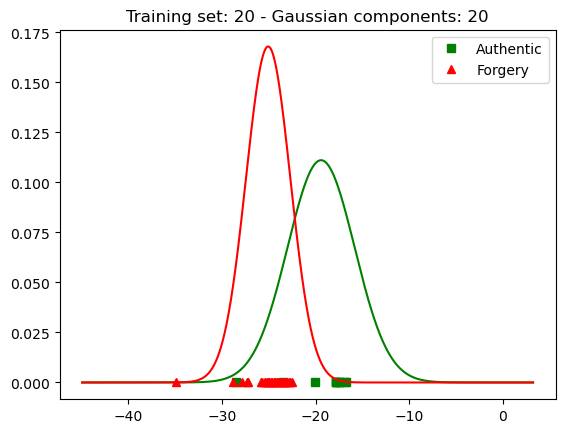

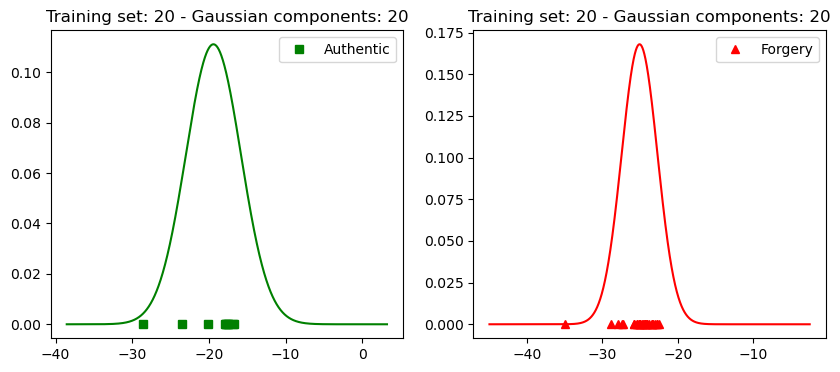

In [16]:
GMM_distribution(auth_lst, imp_lst, 20, 20)

#### Set # 2 - 10 Training Signatures, 20 Gaussian Components

Mean of genuine scores: -22.0908
Standard deviation of genuine scores: 6.6611
Mean of imposter scores: -36.3394
Standard deviation of imposter scores: 4.0373


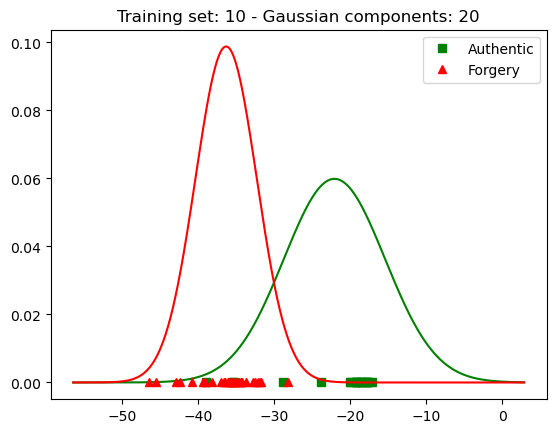

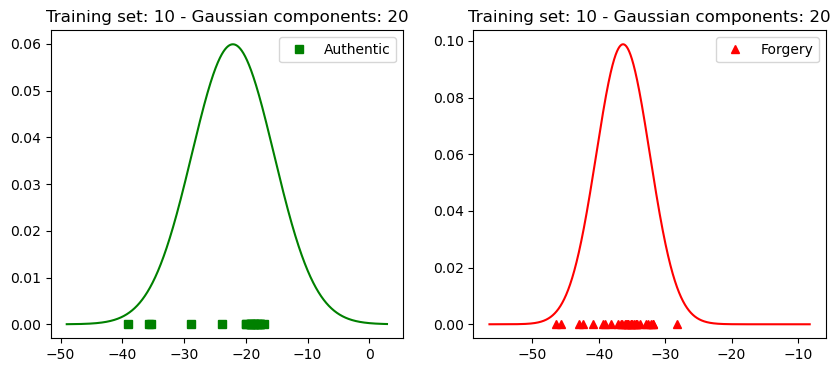

In [17]:
GMM_distribution(auth_lst, imp_lst, 10, 20)

#### Set # 3 - 10 Training Signatures, 40 Gaussian Components

Mean of genuine scores: -27.1035
Standard deviation of genuine scores: 11.4533
Mean of imposter scores: -51.7606
Standard deviation of imposter scores: 11.9801


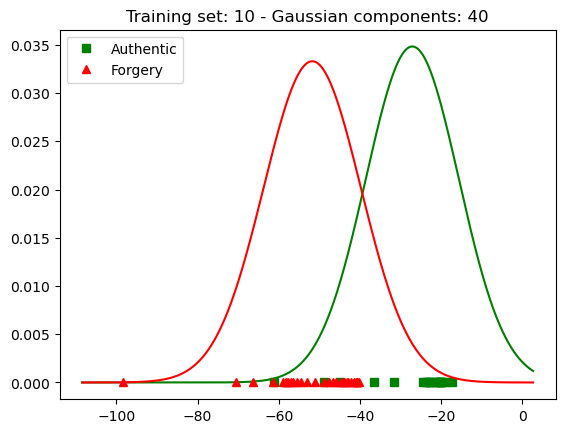

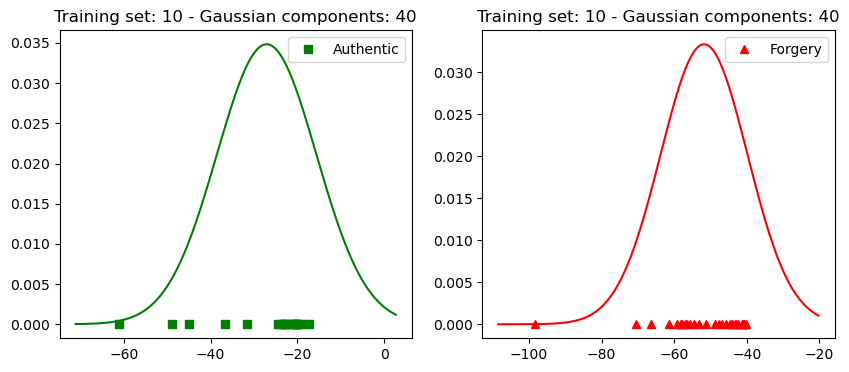

In [18]:
GMM_distribution(auth_lst, imp_lst, 10, 40)

#### Set # 4 - 20 Training Signatures, 40 Gaussian Components

Mean of genuine scores: -20.0472
Standard deviation of genuine scores: 4.3176
Mean of imposter scores: -30.2072
Standard deviation of imposter scores: 1.3501


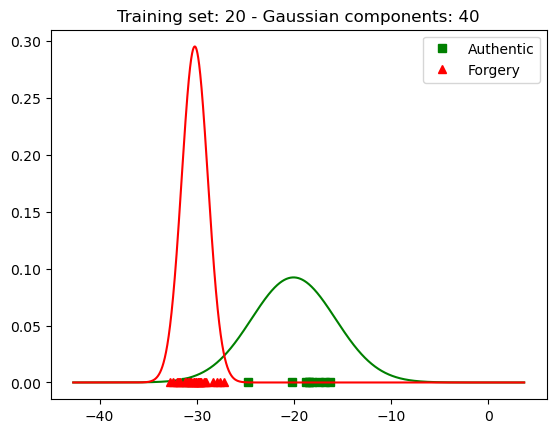

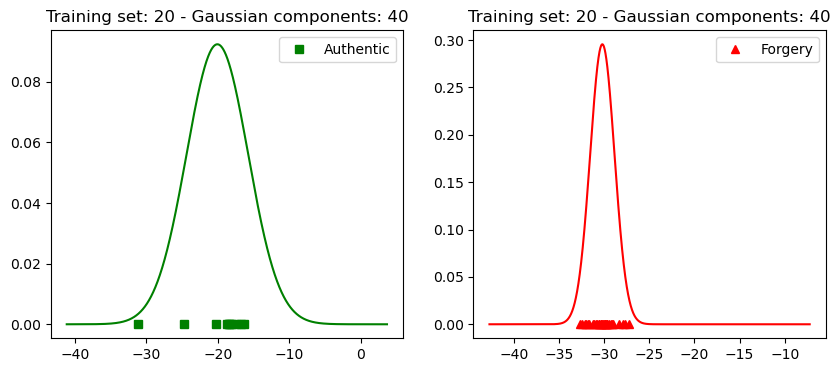

In [19]:
GMM_distribution(auth_lst, imp_lst, 20, 40)

#### Analysis Of Data:

## **Exercise 2:**

Loading genuine and imposter signature data:

In [20]:
base_dir = './Data/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'Usman-Labs/'
dir_impostor = base_dir + 'Mushtaba-Word/'

# amount of signatures to be loaded
total_signatures = 30
numForgedSigs = 30

# lists to store the loaded signatures
auth_lst = []
imp_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_imp = pd.read_csv(dir_impostor + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values)
    imp_lst.append(csv_imp.values)

print('Size of the "auth_lst" vector: %d' % (len(auth_lst)))
print('Size of the "imp_lst" vector: %d' % (len(imp_lst)))

Size of the "auth_lst" vector: 30
Size of the "imp_lst" vector: 30


Mean of genuine scores: -20.0257
Standard deviation of genuine scores: 5.6449
Mean of imposter scores: -33.9834
Standard deviation of imposter scores: 2.6749


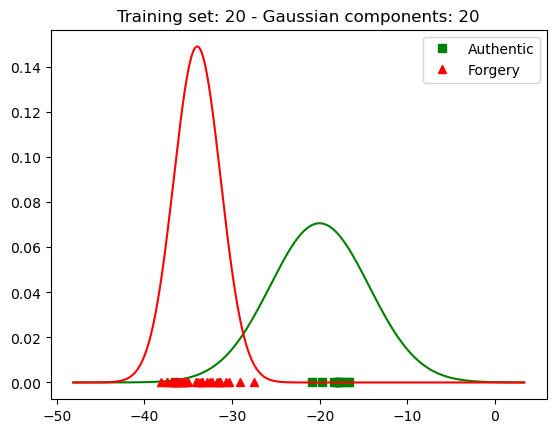

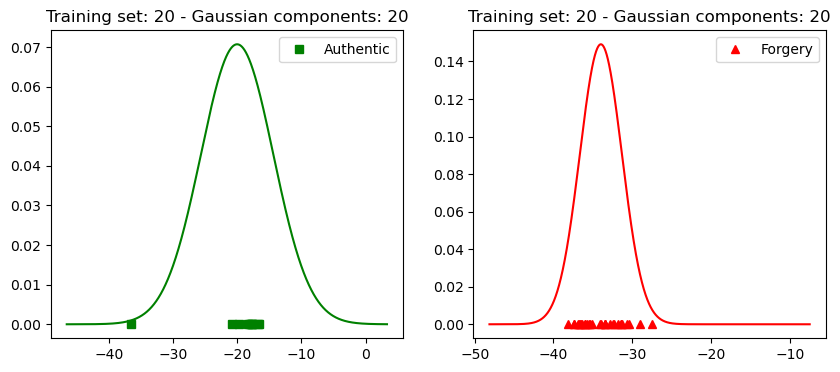

In [21]:
GMM_distribution(auth_lst, imp_lst, 20, 20)

#### Analysis Of Data:

Mean of genuine scores: -22.5674
Standard deviation of genuine scores: 6.0530
Mean of imposter scores: -37.3059
Standard deviation of imposter scores: 2.5957


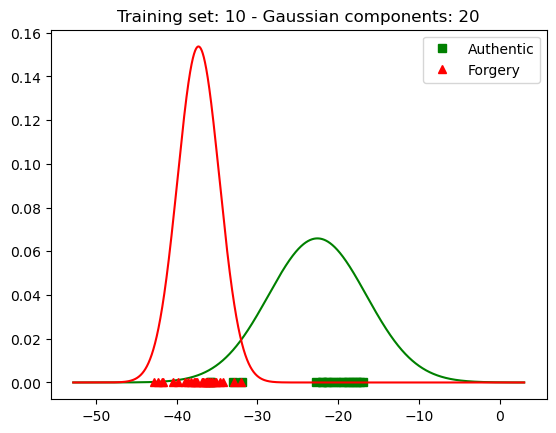

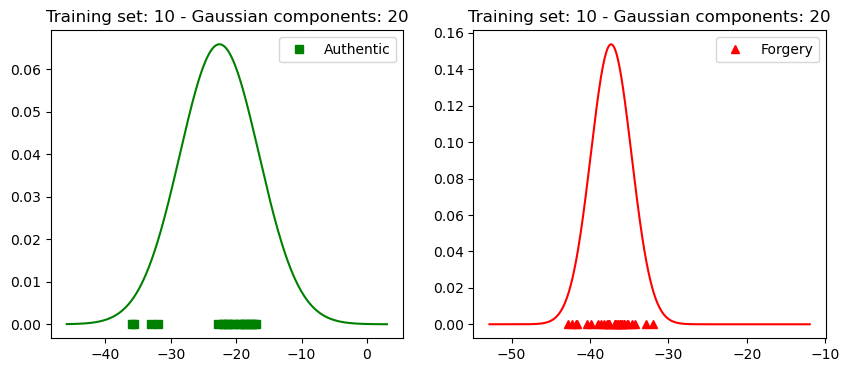

In [22]:
GMM_distribution(auth_lst, imp_lst, 10, 20)

Mean of genuine scores: -22.2992
Standard deviation of genuine scores: 4.2816
Mean of imposter scores: -37.0516
Standard deviation of imposter scores: 1.4888


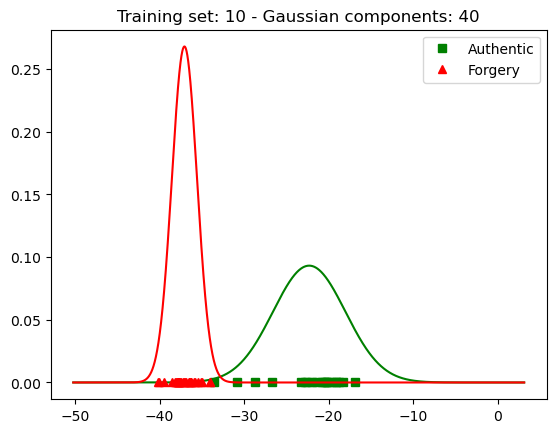

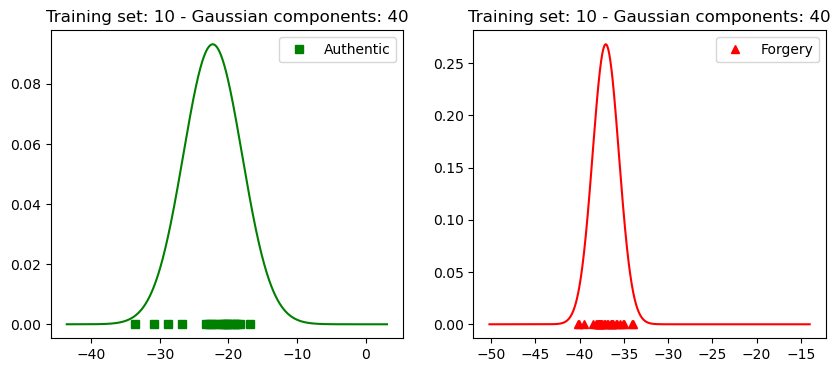

In [23]:
GMM_distribution(auth_lst, imp_lst, 10, 40)

Mean of genuine scores: -20.3393
Standard deviation of genuine scores: 4.5609
Mean of imposter scores: -32.0924
Standard deviation of imposter scores: 1.1201


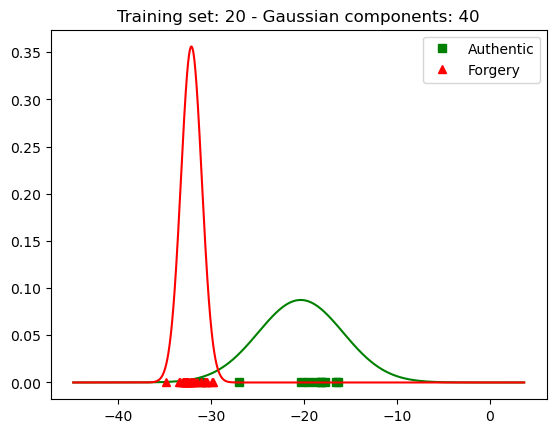

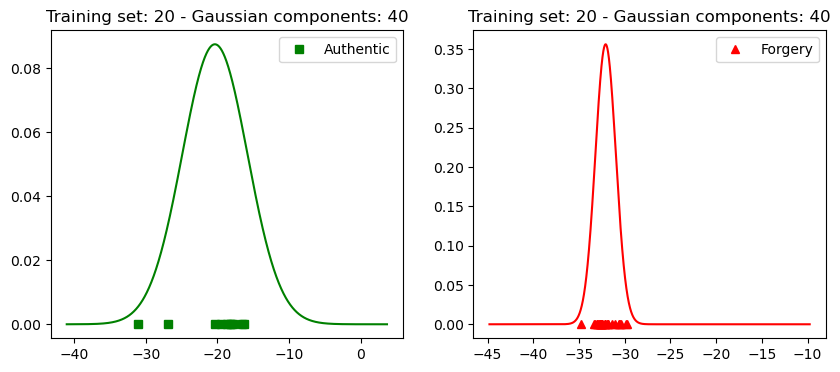

In [24]:
GMM_distribution(auth_lst, imp_lst, 20, 40)

#### Analysis Of Data:
- The mixtures for the GMM distributions were kept consistent for better analysis (20, 20), (10, 20), (20, 40), (10, 40):

-When compared with the graphs form expercise 1, thier appears to be a clear divergence. The graphs from exercise 2 have less overlap between the Authentic and Forgery samples than the ones from exercise 1. This points to a greater accuracy of the model. the area of false match rate seems to be reduced. 

-One unique change is that, the GGM mixture that used the the smallest sample size and the greatest amount of Gaussian Components returned the lowest False Match Rate. This is odd considering that the FMR should be reduced with a higer sample size.

-Overall, exercise 1 showed the benefit of having a balanced number of samples, considering that the best distribution was in the 20/20 split. The results from exercise 2 are largely inconclusive

## **Exercise 3:**

#### Analysis Of Data:


# **Conclusion:**